In [1]:
# Import the needed pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab 
from pylab import xticks
import seaborn as sns
import statistics
import warnings
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


# Express_Lanes dataset

In [3]:
# Read the dataset
Ex_Ln = pd.read_csv("/Users/UE/Desktop/508Data/Express_Lanes.csv")
Ex_Ln.info()
Ex_Ln.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OBJECTID                         27 non-null     int64  
 1   District                         27 non-null     int64  
 2   Route                            27 non-null     object 
 3   Direction                        27 non-null     object 
 4   Begin_County                     27 non-null     object 
 5   Begin_Post_Mile                  27 non-null     object 
 6   End_County                       27 non-null     object 
 7   End_Post_Mile                    27 non-null     object 
 8   Begin_Abs_Post_Mile              27 non-null     float64
 9   End_Abs_Post_Mile                27 non-null     float64
 10  Description                      27 non-null     object 
 11  Length__Lane_Miles_              27 non-null     float64
 12  Opening_Date            

,OBJECTID,District,Route,Direction,Begin_County,Begin_Post_Mile,End_County,End_Post_Mile,Begin_Abs_Post_Mile,End_Abs_Post_Mile,Description,Length__Lane_Miles_,Opening_Date,Occupancy_Requirement_for_Toll_,Hours_of_Operation,Comments,Shape_Length
0,1,4,237,EB,SCL,R3.343,SCL,R9.164R,3.400,9.216,Mathilda Avenue to I-880,7.316,Mathilda Ave. to Zanker Rd. - 11/15/2019; Zank...,3+,M-F; 05:00-20:00,Conversion from HOV to Express Lane. ; Mileage...,11502.249796
1,2,4,580,EB,ALA,18.913,ALA,R8.762,35.097,24.916,Hacienda Rd to Greenville Rd,17.041,2/19/2016,2+,M-F; 05:00-20:00,Converted from HOV lane. Includes dual lane se...,20683.777789
2,3,7,10S,EB,LA,16.968,LA,27.96,0.000,10.992,Alameda St to Baldwin Ave,17.022,Alameda St to Mission Rd - Apr 1990; Mission R...,3+ 5:00-9:00 am M-F; 3+ 4:00-7:00 pm M-F; 2+ A...,24 hrs,Mileage includes dual lane segment from PM 22....,21359.741104
3,4,7,10,EB,LA,27.963,LA,30.995,26.463,29.495,Baldwin Ave to I-605,5.273,Baldwin Ave to Rte 605 � Feb 2005; Converted t...,3+ 5:00-9:00 am M-F; 3+ 4:00-7:00 pm M-F; 2+ A...,24 hrs,Mileage includes dual lane segment from PM 27....,5877.568529
4,5,8,91,EB,RIV,R0.000,RIV,7.514,37.232,44.858,Orange County Line to I-15,16.524,Converted from single lane HOV lane to dual Ex...,3+; (Pay 50% discounted toll Monday thru Frida...,24 hrs,; Dual lane facility from PM R0.000 to PM 6.41...,14765.391421


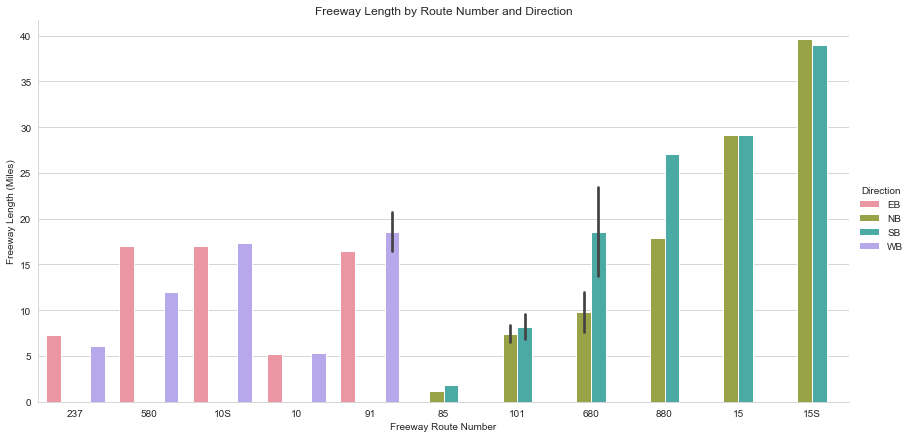

In [4]:

# Create a grouped bar chart using seaborn
sns.set_style("whitegrid")
sns.set_palette("husl", 2)
ax = sns.catplot(x='Route', y='Length__Lane_Miles_', hue='Direction', 
                 kind='bar', data=Ex_Ln, height = 6, aspect=2)

# Set the axis labels and title
ax.set_xlabels('Freeway Route Number')
ax.set_ylabels('Freeway Length (Miles)')
ax.set(title='Freeway Length by Route Number and Direction')

# Show the plot
plt.show()

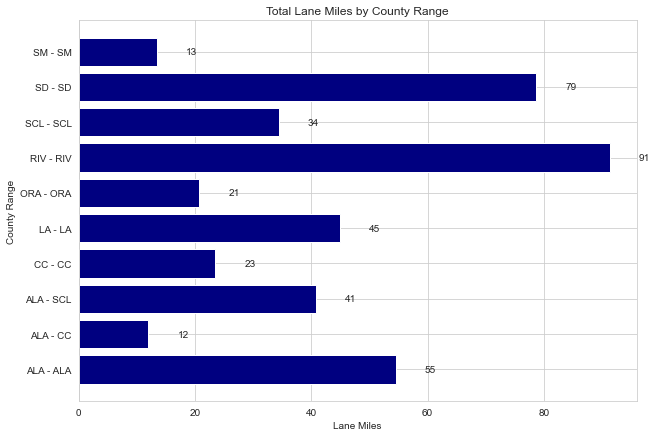

In [5]:

# Group the data by county and sum the lane miles
grouped_data = Ex_Ln.groupby(['Begin_County', 'End_County']).agg({'Length__Lane_Miles_': 'sum'}).reset_index()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(y=grouped_data['Begin_County'] + ' - ' + grouped_data['End_County'], width=grouped_data['Length__Lane_Miles_'], color='navy')

# Set the axis labels and title
ax.set_xlabel('Lane Miles')
ax.set_ylabel('County Range')
ax.set_title('Total Lane Miles by County Range')

# Add labels to the bars
for i, bar in enumerate(bars):
    value = bar.get_width()
    x_pos = value + 5
    y_pos = i
    ax.text(x_pos, y_pos, str(round(value)), va='center')

# Show the plot
plt.show()

# HOV Dataset

In [6]:
# Read the dataset
HOV = pd.read_csv("/Users/UE/Desktop/508Data/HOV.csv")
HOV.info()
HOV.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OBJECTID               109 non-null    int64  
 1   District               109 non-null    int64  
 2   Route                  109 non-null    object 
 3   Direction              109 non-null    object 
 4   Begin_County           109 non-null    object 
 5   Begin_Post_Mile        109 non-null    object 
 6   End_County             109 non-null    object 
 7   End_Post_Mile          109 non-null    object 
 8   Begin_Abs_Post_Mile    106 non-null    float64
 9   End_Abs_Post_Mile      106 non-null    float64
 10  Description            109 non-null    object 
 11  Length__Lane_Miles_    109 non-null    float64
 12  Occupancy_Requirement  109 non-null    object 
 13  Hours_of_Operation     109 non-null    object 
 14  Segment_Opening_Date   105 non-null    object 
 15  Commen

,OBJECTID,District,Route,Direction,Begin_County,Begin_Post_Mile,End_County,End_Post_Mile,Begin_Abs_Post_Mile,End_Abs_Post_Mile,Description,Length__Lane_Miles_,Occupancy_Requirement,Hours_of_Operation,Segment_Opening_Date,Comments,Shape_Length
0,1,3,50,EB,SAC,R5.371,ED,5.834,11.005,34.632,Watt Ave to Cameron Park Dr,23.627,2+,M-F 06:00-10:00 and 15:00-19:00,Watt Ave to Sunrise Blvd - Dec 2011; Sunrise B...,NaN,48659.155980
1,2,3,80,EB,SAC,M0.767,PLA,4.718,84.691,106.237,West El Camino Ave to SR-65,21.546,2+,M-F 06:00-10:00 and 15:00-19:00,Yolo Co Line to Longview Dr - Dec 2016; Longvi...,NaN,44432.185806
2,3,4,80,EB,SOL,0.504,SOL,0.673,27.995,28.164,Carquinez Bridge Toll Plaza,0.255,3+,M-F 05:00-10:00 and 15:00-19:00,"Opened; W/O Toll Plaza to E/O Toll Plaza, 07/3...",2-Seat Vehicles with 2 Persons Permitted; Toll...,348.131415
3,4,4,80,EB,SOL,R11.485,SOL,19.594,38.976,47.096,Red Top Road to Air Base Pkwy,8.120,2+,M-F 05:00-10:00 and 15:00-19:00,"Opened; Red Top Road to E/O Air Base Pkwy., 11...",NaN,16660.846138
4,5,7,10,EB,LA,30.995,LA,48.265,29.495,46.765,I-605 to San Bernardino County Line,17.270,2+,24 Hr,Rte 605 to 0.6 mi west of Puente Ave (Francisq...,Continues into San Bernardino County,33527.727027


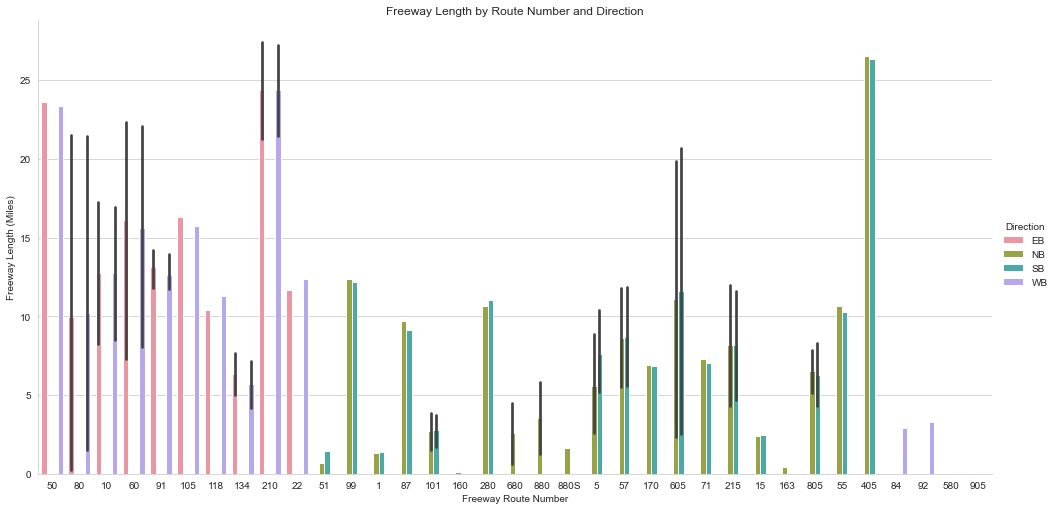

In [7]:
# Create a grouped bar chart using seaborn
sns.set_style("whitegrid")
sns.set_palette("husl", 2)
ax = sns.catplot(x='Route', y='Length__Lane_Miles_', hue='Direction', 
                 kind='bar', data=HOV, height = 7, aspect=2)

# Set the axis labels and title
ax.set_xlabels('Freeway Route Number')
ax.set_ylabels('Freeway Length (Miles)')
ax.set(title='Freeway Length by Route Number and Direction')

# Show the plot
plt.show()

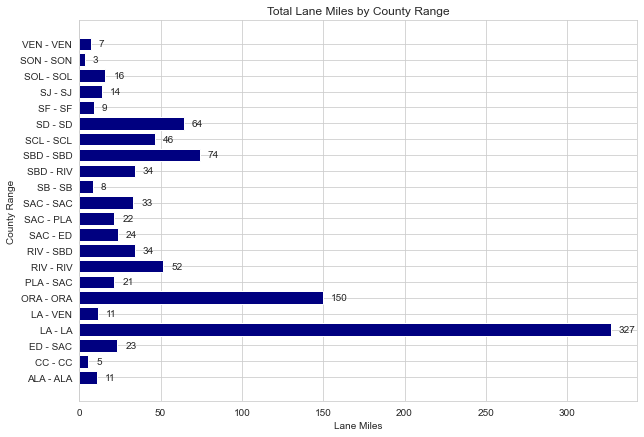

In [8]:

# Group the data by county and sum the lane miles
grouped_data = HOV.groupby(['Begin_County', 'End_County']).agg({'Length__Lane_Miles_': 'sum'}).reset_index()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(y=grouped_data['Begin_County'] + ' - ' + grouped_data['End_County'], width=grouped_data['Length__Lane_Miles_'], color='navy')

# Set the axis labels and title
ax.set_xlabel('Lane Miles')
ax.set_ylabel('County Range')
ax.set_title('Total Lane Miles by County Range')

# Add labels to the bars
for i, bar in enumerate(bars):
    value = bar.get_width()
    x_pos = value + 5
    y_pos = i
    ax.text(x_pos, y_pos, str(round(value)), va='center')

# Show the plot
plt.show()

# Traffic Volumes_AADT

In [9]:
# Read the dataset
vol = pd.read_csv("/Users/UE/Desktop/508Data/Traffic_Volumes_AADT.csv")
vol.info()
vol.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7114 entries, 0 to 7113
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OBJECTID         7114 non-null   int64  
 1   DISTRICT         7113 non-null   float64
 2   ROUTE            7114 non-null   int64  
 3   RTE_SFX          42 non-null     object 
 4   COUNTY           7114 non-null   object 
 5   PM_PFX           2367 non-null   object 
 6   PM               7114 non-null   float64
 7   PM_SFX           369 non-null    object 
 8   DESCRIPTION      7114 non-null   object 
 9   BACK_PEAK_HOUR   6471 non-null   float64
 10  BACK_PEAK_MADT   6471 non-null   float64
 11  BACK_AADT        6471 non-null   float64
 12  AHEAD_PEAK_HOUR  6483 non-null   float64
 13  AHEAD_PEAK_MADT  6483 non-null   float64
 14  AHEAD_AADT       6483 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 833.8+ KB


,OBJECTID,DISTRICT,ROUTE,RTE_SFX,COUNTY,PM_PFX,PM,PM_SFX,DESCRIPTION,BACK_PEAK_HOUR,BACK_PEAK_MADT,BACK_AADT,AHEAD_PEAK_HOUR,AHEAD_PEAK_MADT,AHEAD_AADT
0,1,12.0,1,NaN,ORA,R,0.129,NaN,"DANA POINT, JCT. RTE. 5",NaN,NaN,NaN,4250.0,42000.0,38250.0
1,2,12.0,1,NaN,ORA,R,0.780,NaN,"DANA POINT, DOHENY PARK ROAD",4250.0,42000.0,38900.0,4350.0,43500.0,38900.0
2,3,12.0,1,NaN,ORA,R,1.077,NaN,BREAK IN RTE,NaN,NaN,NaN,NaN,NaN,NaN
3,4,12.0,1,NaN,ORA,NaN,8.430,NaN,"LAGUNA BEACH, MOUNTAIN ROAD",3200.0,40500.0,37900.0,3200.0,40500.0,37900.0
4,5,12.0,1,NaN,ORA,NaN,9.418,NaN,"LAGUNA BEACH, JCT. RTE. 133 NORTH",3400.0,43000.0,38800.0,3850.0,43000.0,38800.0


In [10]:
grouped_data = vol.groupby('ROUTE').mean().reset_index()
grouped_data_back = grouped_data[['ROUTE', 'BACK_PEAK_HOUR','BACK_AADT']]
grouped_data_back['Rate'] = (grouped_data_back['BACK_PEAK_HOUR'] / grouped_data_back['BACK_AADT']) * 100
grouped_data_back = grouped_data_back.sort_values( "Rate", ascending = False).head(10)
grouped_data_back.style.background_gradient(cmap="Blues")
grouped_data_back

,ROUTE,BACK_PEAK_HOUR,BACK_AADT,Rate
187,220,474.000000,322.000000,147.204969
178,207,300.000000,740.000000,40.540541
120,136,80.000000,280.000000,28.571429
225,284,100.000000,370.000000,27.027027
217,270,120.000000,450.000000,26.666667
214,266,40.000000,160.000000,25.000000
206,254,263.333333,1106.666667,23.795181
146,167,20.000000,90.000000,22.222222
131,150,1967.333333,9116.666667,21.579525
138,158,255.000000,1187.500000,21.473684


In [11]:
grouped_data_ahead = grouped_data[['ROUTE', 'AHEAD_PEAK_HOUR','AHEAD_AADT']]
grouped_data_ahead['Rate'] = (grouped_data_ahead['AHEAD_PEAK_HOUR'] / grouped_data_ahead['AHEAD_AADT']) * 100
grouped_data_ahead = grouped_data_ahead.sort_values( "Rate", ascending = False).head(10)
grouped_data_ahead.style.background_gradient(cmap="Blues")
grouped_data_ahead

,ROUTE,AHEAD_PEAK_HOUR,AHEAD_AADT,Rate
217,270,90.000000,210.000000,42.857143
178,207,300.000000,750.000000,40.000000
192,229,60.000000,170.000000,35.294118
214,266,75.000000,215.000000,34.883721
84,95,718.000000,2685.000000,26.741155
187,220,76.000000,322.000000,23.602484
85,96,272.727273,1155.681818,23.598820
138,158,315.000000,1342.500000,23.463687
225,284,150.000000,660.000000,22.727273
218,271,51.428571,226.428571,22.712934


### AADT: Annual average daily traffic
### MADT: monthly average daily traffic
### BACK AADT: reprent traffic south or west of the count location
### AHEAD AADT: reprent traffic north or east of the count location